# Installation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from copy import copy
from tqdm import tqdm
import datasets
from datasets import concatenate_datasets, DatasetDict

from blur.backend.config import WIDER_FACE_PATH, CUSTOM_FACE_PATH
from blur.backend.drawing import (
    draw_faces_with_bbox, plot_categories,
)
from blur.backend.utils import (
    seed_everything, calculate_unique,
    remove_people, invalid_filter,
)

# Description

WIDER FACE dataset is a face detection benchmark dataset, of which images are selected from the publicly available WIDER dataset. We choose 32,203 images and label 393,703 faces with a high degree of variability in scale, pose and occlusion as depicted in the sample images.

**faces**: a dictionary of face attributes for the faces present on the image
> **bbox**: the bounding box of each face (in the coco format) \
> **blur**: the blur level of each face, with possible values including clear (0), normal (1) and heavy (2)\
> **expression**: the facial expression of each face, with possible values including typical (0) and exaggerate (1)\
> **illumination**: the lightning condition of each face, with possible values including normal (0) and exaggerate (1)\
> **occlusion**: the level of occlusion of each face, with possible values including no (0), partial (1) and heavy (2)\
> **pose**: the pose of each face, with possible values including typical (0) and atypical (1)\
> **invalid**: whether the image is valid or invalid.

In [3]:
dataset = datasets.load_from_disk(str(WIDER_FACE_PATH))

In [4]:
example = dataset["train"][0]
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1385>,
 'faces': {'bbox': [[449.0, 330.0, 122.0, 149.0]],
  'blur': [0],
  'expression': [0],
  'illumination': [0],
  'occlusion': [0],
  'pose': [0],
  'invalid': [False]}}

# Example of Images

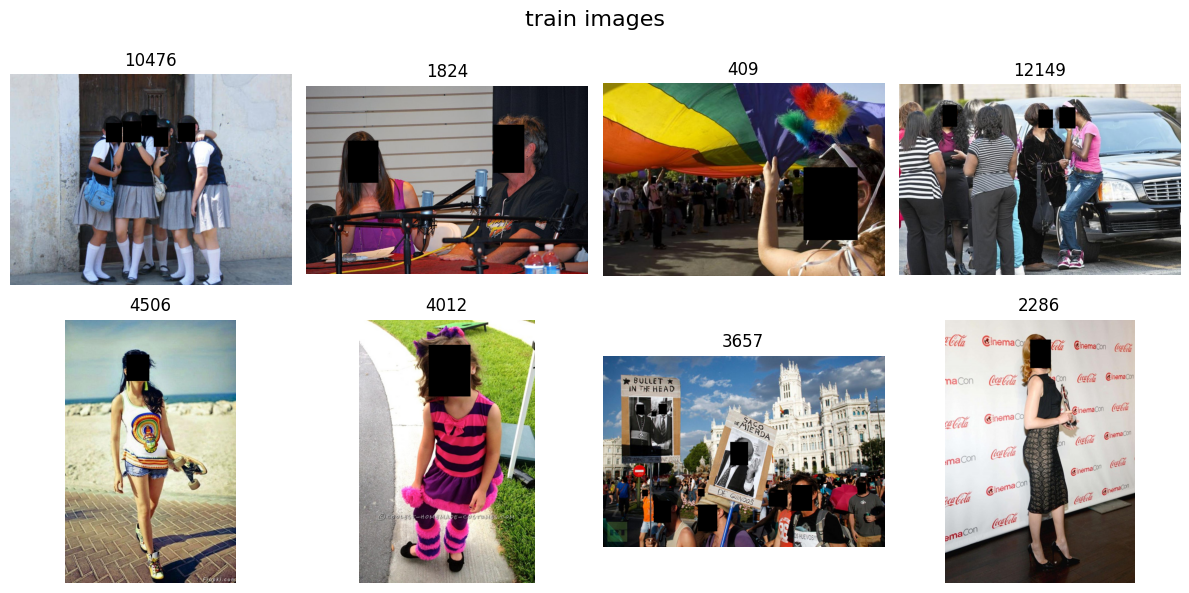

In [5]:
seed_everything()
draw_faces_with_bbox(dataset, split="train", hide_face=True)

In [6]:
seed_everything()
draw_faces_with_bbox(dataset, split="validation", hide_face=True)

In [7]:
seed_everything()
draw_faces_with_bbox(dataset, split="test", hide_face=True)

# Prune Dataset

In [8]:
invalid_dataset = dataset["train"].filter(
    invalid_filter,
    batched=True, batch_size=100,
    input_columns=["faces"],
)

Filter:   0%|          | 0/12880 [00:00<?, ? examples/s]

In [9]:
fig, axs = plt.subplots(1, 4, figsize=[15, 3])
plt.suptitle("Invalid Images", fontsize=15)
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].imshow(invalid_dataset[i]['image'])
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
custom_dataset = DatasetDict({
    "train": remove_people(dataset, "train"),
    "validation": remove_people(dataset, "validation"),
})

In [11]:
custom_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'faces'],
        num_rows: 6423
    })
    validation: Dataset({
        features: ['image', 'faces'],
        num_rows: 1537
    })
})

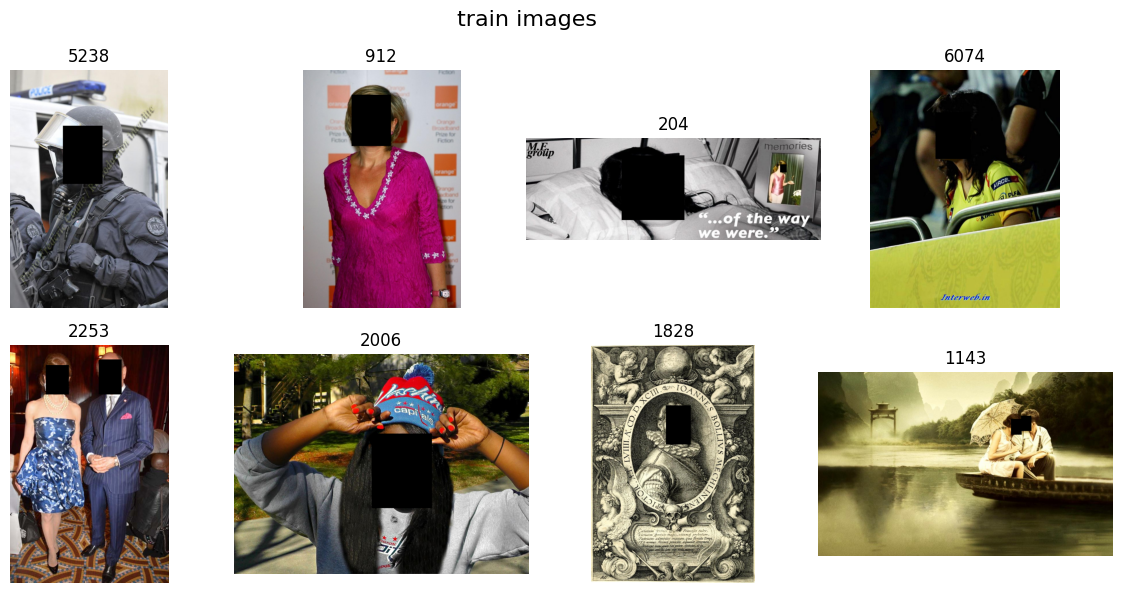

In [12]:
seed_everything()
draw_faces_with_bbox(custom_dataset, split="train", hide_face=True)

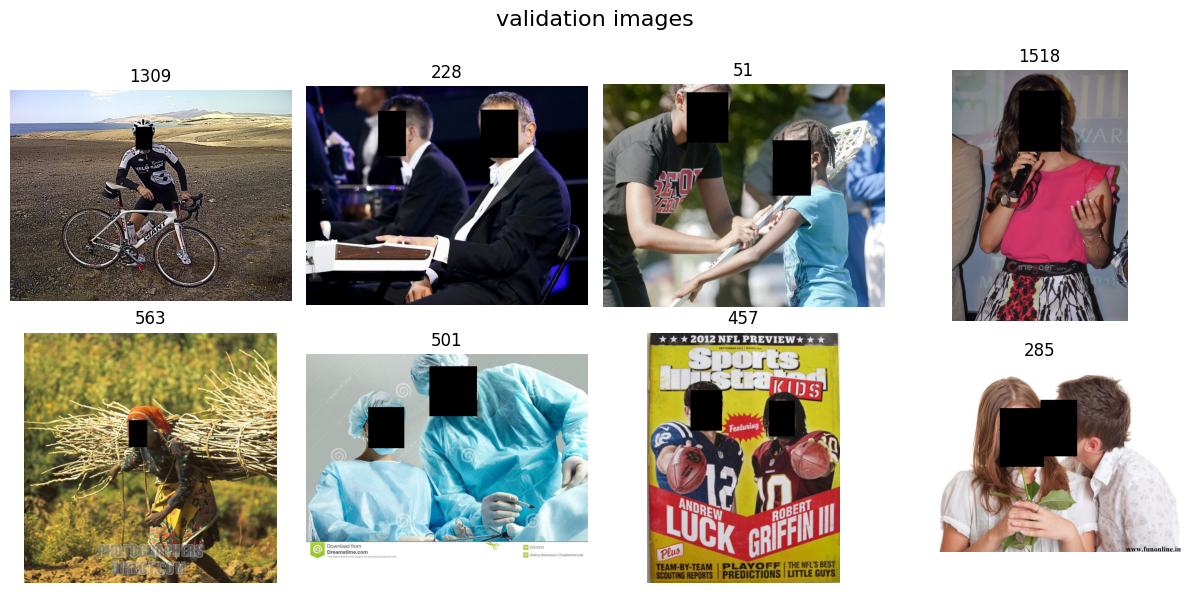

In [13]:
seed_everything()
draw_faces_with_bbox(custom_dataset, split="validation", hide_face=True)

# Pruned Dataset Statistics

In [14]:
unique = calculate_unique(dataset)
custom_unique = calculate_unique(custom_dataset)

100%|███████████████████████████████████| 1537/1537 [00:00<00:00, 203120.71it/s]


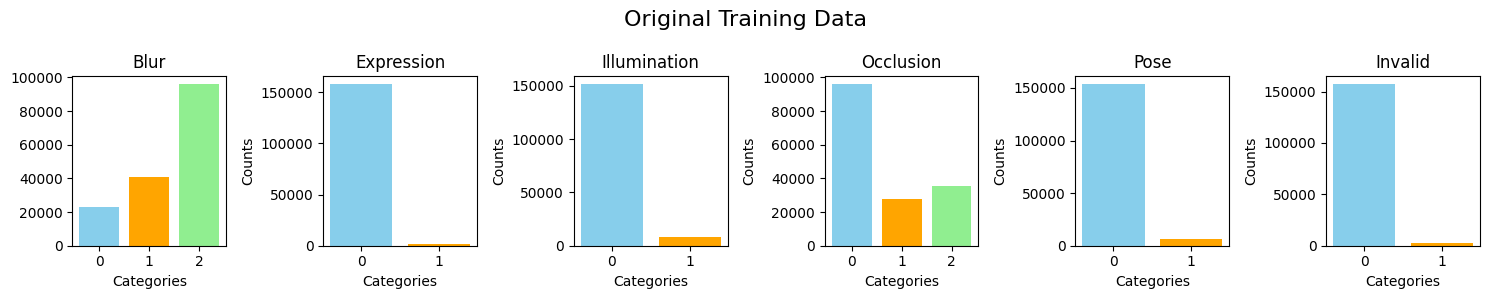

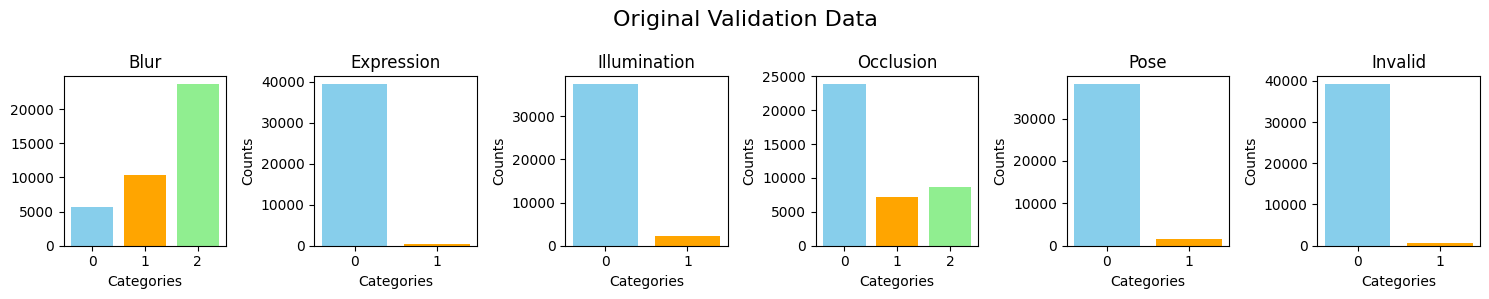

In [15]:
plot_categories(unique["train"], "Original Training Data")
plot_categories(unique["validation"], "Original Validation Data")

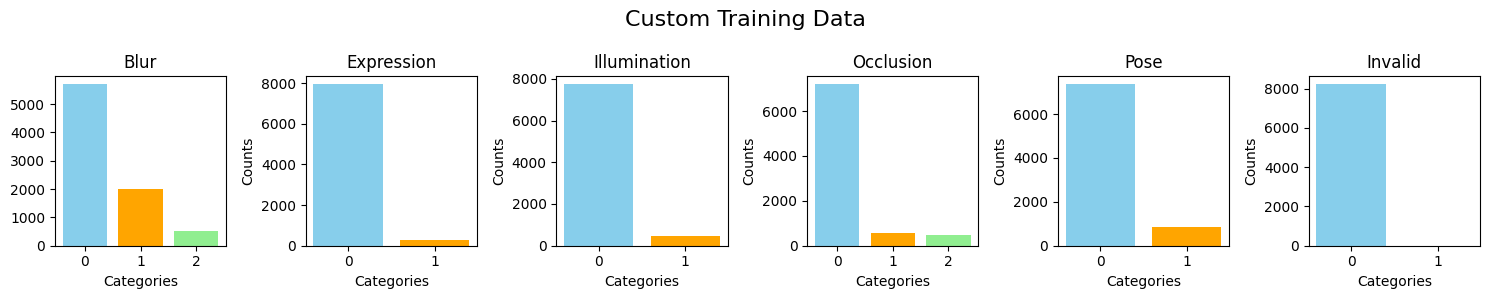

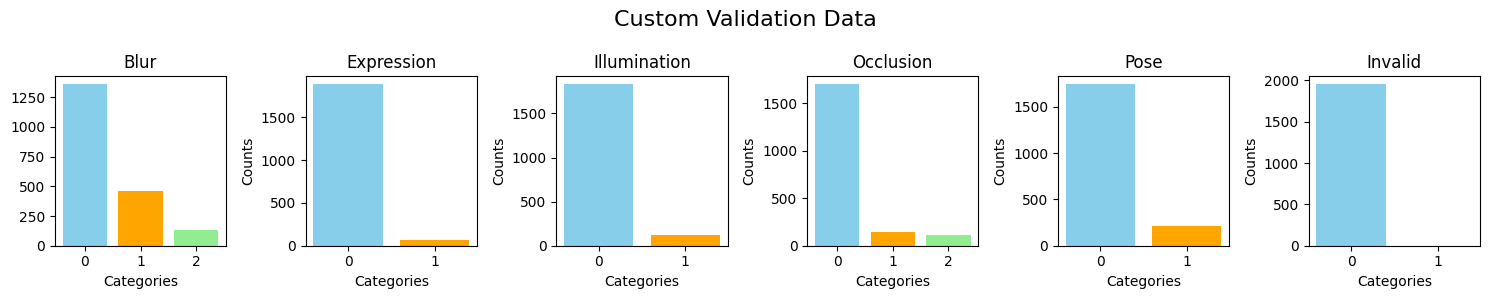

In [16]:
plot_categories(custom_unique["train"], "Custom Training Data")
plot_categories(custom_unique["validation"], "Custom Validation Data")

In [17]:
custom_dataset.save_to_disk(str(CUSTOM_FACE_PATH))

Saving the dataset (0/2 shards):   0%|          | 0/6423 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1537 [00:00<?, ? examples/s]